In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

sys.path.append('../')
from utils.data_generators import DicomDataGenerator

c:\users\dell\desktop\coms4059a - research project\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\dell\desktop\coms4059a - research project\venv\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\users\dell\desktop\coms4059a - research project\venv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Preprocessing

In [2]:
data_path='C:\\Users\\DELL\\Desktop\\COMS4059A - Research Project\\data\\processed'
df=pd.read_csv(os.path.join(data_path, 'meta/meta_info.csv'),
              dtype={'patient_id': str,
                    'nodule_no': str,
                    'slice_no': str})

# use only non-clean scans (scans that contains at least one nodule) for training
df = df[df['is_clean'] == False]
df['is_clean'].unique()

array([False])

In [3]:
df.head()

,patient_id,nodule_no,slice_no,original_image,mask_image,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,is_cancer,is_clean
0,0001,0,000,0001_NI000_slice000,0001_MA000_slice000,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False
1,0001,0,001,0001_NI000_slice001,0001_MA000_slice001,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False
2,0001,0,002,0001_NI000_slice002,0001_MA000_slice002,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False
3,0001,0,003,0001_NI000_slice003,0001_MA000_slice003,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False
4,0001,0,004,0001_NI000_slice004,0001_MA000_slice004,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False


In [4]:
def get_paths(x):
    patient_img_path=os.path.join(data_path, 'image', 'LIDC-IDRI-' + x[0])
    patient_mask_path=os.path.join(data_path, 'mask', 'LIDC-IDRI-' + x[0])
    return [os.path.join(patient_img_path, x[1]+'.npy'), os.path.join(patient_mask_path, x[2]+'.npy')]

temp = df[['patient_id', 
    'original_image', 
    'mask_image']].values

paths = list(map(get_paths, temp))
df_paths = pd.DataFrame(paths, columns=['img_path', 'mask_path'])
df_paths.head()

,img_path,mask_path
0,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
1,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
2,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
3,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
4,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...


In [5]:
df.reset_index(drop=True, inplace=True)
df_paths.reset_index(drop=True, inplace=True)

df = pd.concat([df, df_paths], axis=1, sort=False)
df.head()

,patient_id,nodule_no,slice_no,original_image,mask_image,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,is_cancer,is_clean,img_path,mask_path
0,0001,0,000,0001_NI000_slice000,0001_MA000_slice000,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
1,0001,0,001,0001_NI000_slice001,0001_MA000_slice001,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
2,0001,0,002,0001_NI000_slice002,0001_MA000_slice002,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
3,0001,0,003,0001_NI000_slice003,0001_MA000_slice003,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
4,0001,0,004,0001_NI000_slice004,0001_MA000_slice004,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,True,False,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...


In [6]:
df = df[[
    'subtlety',
    'internalStructure',
    'calcification',
    'sphericity',
    'margin',
    'lobulation',
    'spiculation',
    'texture',
    'malignancy',
    'img_path',
    'mask_path'
]]
df.head()

,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy,img_path,mask_path
0,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
1,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
2,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
3,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...
4,5.0,1.0,6.0,4.0,4.0,3.0,5.0,5.0,5,C:\Users\DELL\Desktop\COMS4059A - Research Pro...,C:\Users\DELL\Desktop\COMS4059A - Research Pro...


# Training

In [7]:
from sklearn.model_selection import train_test_split

batch_size=10
image_size=64
num_batches=int(len(df)/batch_size)
datagen = DicomDataGenerator(df,
                         img_path_col_name='img_path',
                         mask_path_col_name='mask_path',
                         features_cols=['subtlety',
                                        'internalStructure',
                                        'calcification',
                                        'sphericity',
                                        'margin',
                                        'lobulation',
                                        'spiculation',
                                        'texture'],
                         batch_size=batch_size,
                         target_size=(image_size, image_size, 1)
                        )


traingen, valigen = train_test_split(datagen, test_size=0.33)

View some scans and the anotations

[5. 1. 6. 4. 4. 3. 5. 5.]


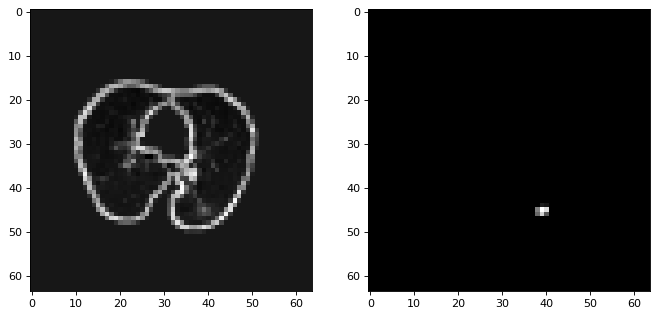

In [8]:
for _, (x_batch_train, y_batch_train) in enumerate(datagen):
    break


plt.figure(figsize=(10, 10), dpi=80)

index=0
    
plt.subplot(1, 2, 1)
plt.imshow(x_batch_train[index], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(y_batch_train[0][index], cmap='gray')
print(y_batch_train[1][index])

In [9]:
from models.pnsamp_2d import PNSAMP_2D

model = PNSAMP_2D(num_attributes=8, input_size=(image_size, image_size, 1))
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [10]:
# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00075)

# Instantiate a loss function.
loss_fn1 = tf.keras.losses.BinaryCrossentropy()
loss_fn2 = tf.keras.losses.MeanSquaredError()

In [11]:
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(traingen):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape(persistent=True) as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            segmentation_logits, multi_regr_logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value1 = loss_fn1( y_batch_train[0], segmentation_logits)
            loss_value2 = loss_fn2( y_batch_train[1], multi_regr_logits)
            print(loss_value1.numpy(), loss_value2.numpy())
        
        """MULTI-CLASSIFICATOIN"""
        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient([loss_value1, loss_value2], model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        

        # Log every 200 batches.
        """if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))"""


Start of epoch 0
0.6929409 12.383106
0.04900495 11.768306
0.078357786 11.488257
0.58346075 10.028967
0.62621003 10.001457
0.06898077 10.634259
0.047126196 7.790535
0.28594142 9.212764
0.07187597 9.175997
0.10655467 11.677925
0.039428715 5.873109
0.027246362 7.4554605
0.04420932 8.3848
0.112358175 6.176642
0.33136544 9.307653
0.1381967 8.926172
0.07760477 8.78362
0.05059769 7.38869
0.060556054 9.621847
0.06633638 9.510887
0.09844299 7.590586
0.16489786 6.758996
0.104032636 7.6406317
0.10755749 6.629298
0.09282047 8.769366
0.06314446 7.605489
0.06696167 6.679541
0.08304814 6.427565
0.09700036 8.724248
0.07343442 8.804713
0.084650084 7.902536
0.10458858 8.291853
0.08275953 7.5009627
0.1045448 9.46467
0.1877962 7.2592926
0.07624455 8.036029
0.07349248 6.4135256
0.06782361 6.5961685
0.051353395 6.605069
0.040246237 5.0480933
0.19271842 7.028128
0.037491858 6.60485
0.180072 8.30835
0.04280892 6.860615
0.028516019 7.884366
0.040762413 7.2846284
0.042739984 8.582982
0.056274794 8.521652
0.027

KeyboardInterrupt: 

In [ ]:
img, _ = model(x_batch_train[index])

In [ ]:
plt.imshow(img[0])